<a href="https://colab.research.google.com/github/ProgrammerRez/CC_Fraud/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [ ]:
df = pd.read_csv('Data/Fraud.csv')
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Performing EDA (Exploratory Data Analysis)


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.step.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Visualizing the Data

#### **Histogram Showing Fraud Transaction Types**

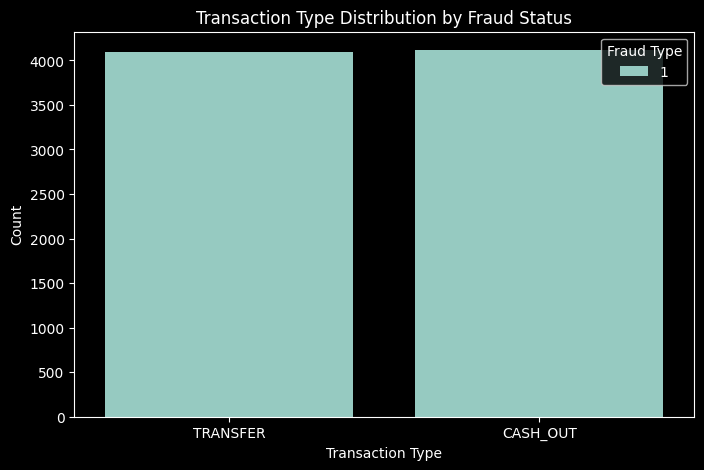

In [ ]:
df_fraud = df[df['isFraud']==1]
plt.figure(figsize=(8,5))
sns.countplot(data=df_fraud, x='type', hue='isFraud')
plt.title('Transaction Type Distribution by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Fraud Type')
plt.show()


#### **Box Plot Showing the Amount Distribution Across Non Fraud and Fraud Transactions**|

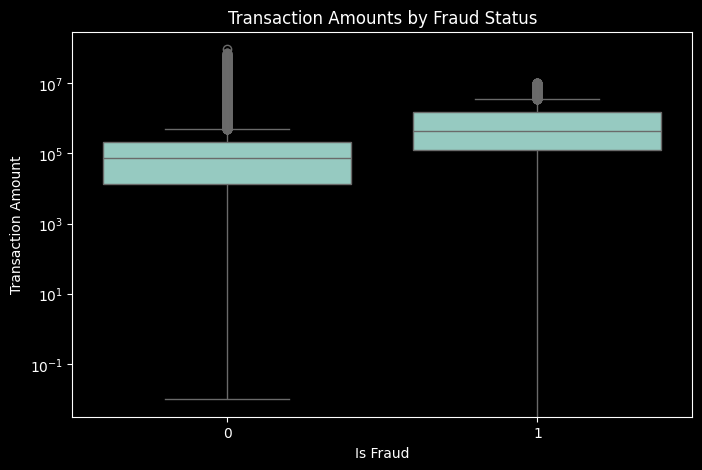

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # makes extreme values easier to see
plt.show()


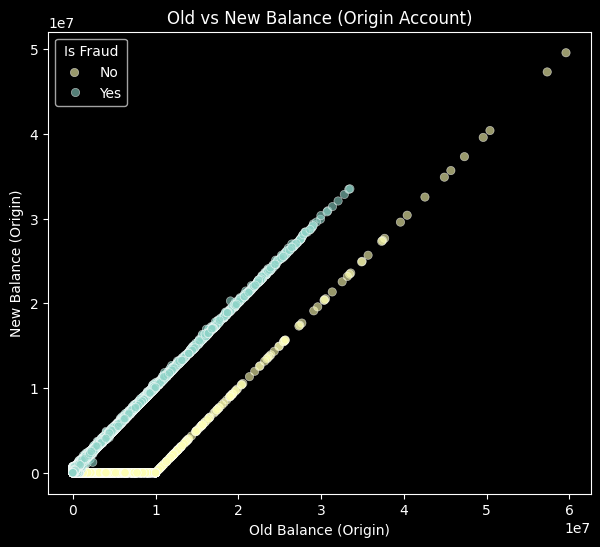

In [ ]:
non_farud_df = df[df['isFraud']==0].sample(n=len(df_fraud)*5,random_state=42)

visual_df = pd.concat([df_fraud,non_farud_df])

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=visual_df,  # random sample for clarity
    x='oldbalanceOrg', y='newbalanceOrig',
    hue='isFraud', alpha=0.6
)
plt.title('Old vs New Balance (Origin Account)')
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()


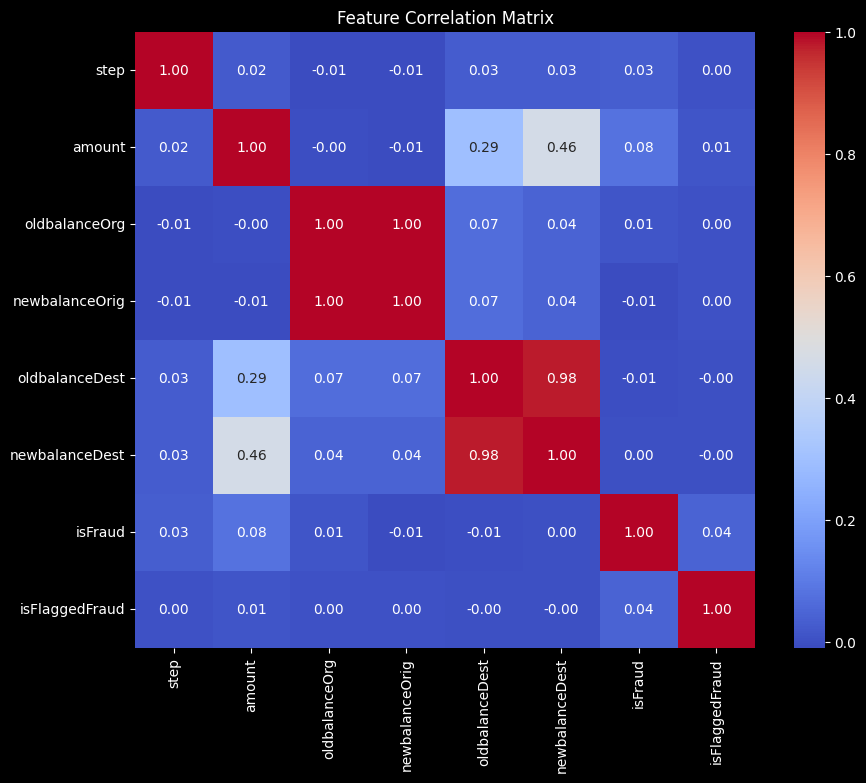

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


## Feaure Engineering

In [ ]:
visual_df['balanceDiffOrig'] = visual_df['oldbalanceOrg'] - visual_df['newbalanceOrig'] - visual_df['amount']
visual_df['balanceDiffDest'] = visual_df['newbalanceDest'] - visual_df['oldbalanceDest'] - visual_df['amount']
visual_df['errorBalanceOrig'] = visual_df['newbalanceOrig'] + visual_df['amount'] - visual_df['oldbalanceOrg']
visual_df['errorBalanceDest'] = visual_df['oldbalanceDest'] + visual_df['amount'] - visual_df['newbalanceDest']


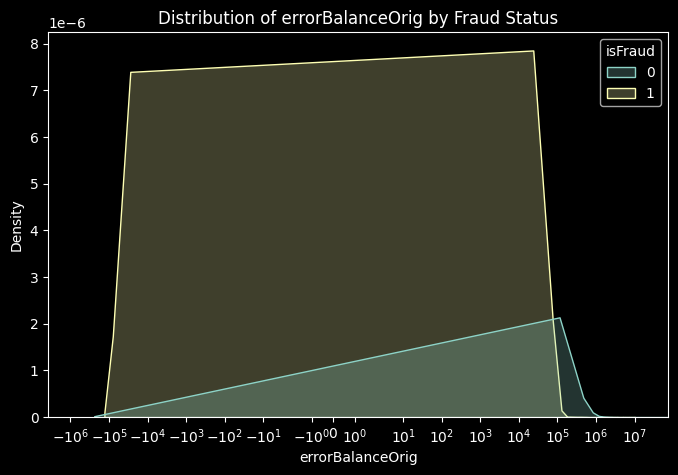

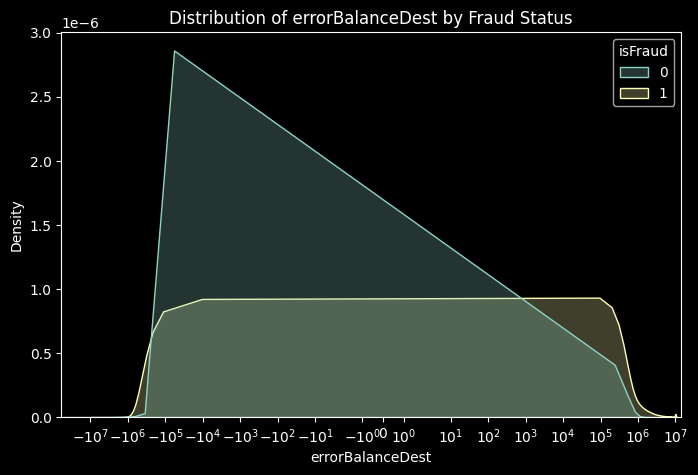

In [ ]:
features = ['errorBalanceOrig', 'errorBalanceDest']

for f in features:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=visual_df, x=f, hue='isFraud', common_norm=False, fill=True)
    plt.title(f'Distribution of {f} by Fraud Status')
    plt.xscale('symlog')  # handles negative and positive values nicely
    plt.show()

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:

df.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
visual_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,errorBalanceOrig,errorBalanceDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.000000e+00,-181.00,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.000000e+00,-21363.00,0.00,21363.00
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0,0.000000e+00,-2806.00,0.00,2806.00
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0,0.000000e+00,-29008.00,0.00,29008.00
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0,0.000000e+00,-20128.00,0.00,20128.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421413,202,PAYMENT,8460.97,C321655558,0.00,0.00,M230781368,0.00,0.00,0,0,-8.460970e+03,-8460.97,8460.97,8460.97
462534,19,PAYMENT,3101.62,C493381115,287463.51,284361.89,M2143820376,0.00,0.00,0,0,-4.547474e-12,-3101.62,0.00,3101.62
1736700,161,TRANSFER,255121.47,C480029200,12018.00,0.00,C1238769016,0.00,255121.47,0,0,-2.431035e+05,0.00,243103.47,0.00
868934,42,CASH_OUT,134925.55,C1261892792,9038.00,0.00,C285241025,1564033.97,1886805.30,0,0,-1.258875e+05,187845.78,125887.55,-187845.78


In [ ]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(sparse_output=False)

# Transaction logic
visual_df['balanceDiffOrig'] = visual_df['oldbalanceOrg'] - visual_df['newbalanceOrig'] - visual_df['amount']
visual_df['balanceDiffDest'] = visual_df['newbalanceDest'] - visual_df['oldbalanceDest'] - visual_df['amount']
visual_df['errorBalanceOrig'] = visual_df['newbalanceOrig'] + visual_df['amount'] - visual_df['oldbalanceOrg']
visual_df['errorBalanceDest'] = visual_df['oldbalanceDest'] + visual_df['amount'] - visual_df['newbalanceDest']
visual_df['amount_to_oldbalance_ratio'] = visual_df['amount'] / (visual_df['oldbalanceOrg'] + 1e-5)
visual_df['balance_change_ratio'] = (visual_df['oldbalanceOrg'] - visual_df['newbalanceOrig']) / (visual_df['oldbalanceOrg'] + 1e-5)

# Temporal
visual_df['hour'] = visual_df['step'] % 24

# Categorical
visual_df = pd.concat([
    visual_df,
    pd.DataFrame(
        data=one.fit_transform(visual_df[['type']]),
        columns=one.get_feature_names_out(),
        index=visual_df.index   # <-- ensures index alignment
    )
], axis=1)


# Entity behavior
avg_amt = visual_df.groupby('nameOrig')['amount'].mean().rename('avg_txn_amount')
visual_df = visual_df.merge(avg_amt, on='nameOrig', how='left')
visual_df['amount_vs_avg_ratio'] = visual_df['amount'] / (visual_df['avg_txn_amount'] + 1e-5)
visual_df['zero_balance_flag'] = ((visual_df['oldbalanceOrg']==0)&(visual_df['newbalanceOrig']==0)).astype(int)

# Nonlinear transforms
visual_df['log_amount'] = np.log1p(visual_df['amount'])
visual_df['squared_amount'] = visual_df['amount'] ** 2


In [ ]:

# Transaction logic
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']
df['amount_to_oldbalance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1e-5)
df['balance_change_ratio'] = (df['oldbalanceOrg'] - df['newbalanceOrig']) / (df['oldbalanceOrg'] + 1e-5)

# Temporal
df['hour'] = df['step'] % 24

# Categorical
df = pd.concat([df,pd.DataFrame(data=one.fit_transform(df[['type']]),columns=one.get_feature_names_out())],axis=1)

# Entity behavior
avg_amt = df.groupby('nameOrig')['amount'].mean().rename('avg_txn_amount')
df = df.merge(avg_amt, on='nameOrig', how='left')
df['amount_vs_avg_ratio'] = df['amount'] / (df['avg_txn_amount'] + 1e-5)
df['zero_balance_flag'] = ((df['oldbalanceOrg']==0)&(df['newbalanceOrig']==0)).astype(int)

# Nonlinear transforms
df['log_amount'] = np.log1p(df['amount'])
df['squared_amount'] = df['amount'] ** 2


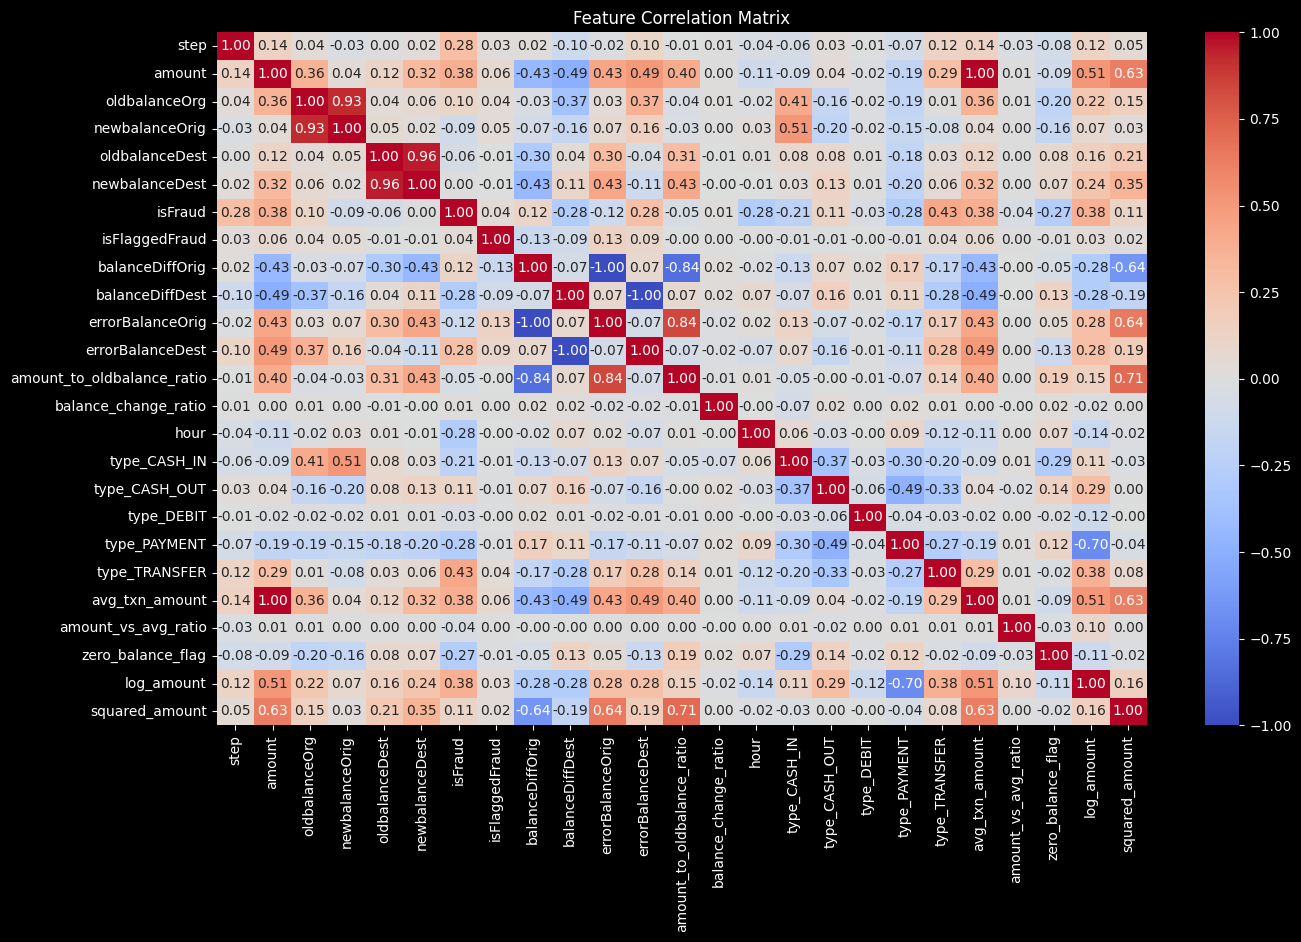

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(visual_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,avg_txn_amount,amount_vs_avg_ratio,zero_balance_flag,log_amount,squared_amount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,...,0.0,0.0,0.0,1.0,0.0,9839.64,1.0,0,9.194276,9.681852e+07
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,...,0.0,0.0,0.0,1.0,0.0,1864.28,1.0,0,7.531166,3.475540e+06
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,...,0.0,0.0,0.0,0.0,1.0,181.00,1.0,0,5.204007,3.276100e+04
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,...,0.0,1.0,0.0,0.0,0.0,181.00,1.0,0,5.204007,3.276100e+04
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,...,0.0,0.0,0.0,1.0,0.0,11668.14,1.0,0,9.364703,1.361455e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,...,0.0,1.0,0.0,0.0,0.0,339682.13,1.0,0,12.735768,1.153839e+11
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,...,0.0,0.0,0.0,0.0,1.0,6311409.28,1.0,0,15.657870,3.983389e+13
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,...,0.0,1.0,0.0,0.0,0.0,6311409.28,1.0,0,15.657870,3.983389e+13
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,...,0.0,0.0,0.0,0.0,1.0,850002.52,1.0,0,13.652996,7.225043e+11


In [ ]:
visual_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,avg_txn_amount,amount_vs_avg_ratio,zero_balance_flag,log_amount,squared_amount
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,...,0.0,0.0,0.0,0.0,1.0,181.00,1.0,0,5.204007,3.276100e+04
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,...,0.0,1.0,0.0,0.0,0.0,181.00,1.0,0,5.204007,3.276100e+04
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,...,0.0,0.0,0.0,0.0,1.0,2806.00,1.0,0,7.939872,7.873636e+06
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,...,0.0,1.0,0.0,0.0,0.0,2806.00,1.0,0,7.939872,7.873636e+06
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,...,0.0,0.0,0.0,0.0,1.0,20128.00,1.0,0,9.909917,4.051364e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49273,202,PAYMENT,8460.97,C321655558,0.00,0.00,M230781368,0.00,0.00,0,...,0.0,0.0,0.0,1.0,0.0,8460.97,1.0,1,9.043337,7.158801e+07
49274,19,PAYMENT,3101.62,C493381115,287463.51,284361.89,M2143820376,0.00,0.00,0,...,0.0,0.0,0.0,1.0,0.0,3101.62,1.0,0,8.040002,9.620047e+06
49275,161,TRANSFER,255121.47,C480029200,12018.00,0.00,C1238769016,0.00,255121.47,0,...,0.0,0.0,0.0,0.0,1.0,255121.47,1.0,0,12.449499,6.508696e+10
49276,42,CASH_OUT,134925.55,C1261892792,9038.00,0.00,C285241025,1564033.97,1886805.30,0,...,0.0,1.0,0.0,0.0,0.0,134925.55,1.0,0,11.812486,1.820490e+10


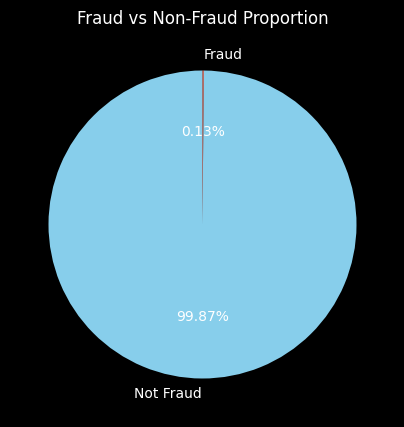

In [ ]:
plt.figure(figsize=(5,5))
df['isFraud'].value_counts().plot.pie(
    autopct='%1.2f%%', startangle=90, colors=['skyblue', 'salmon'], labels=['Not Fraud', 'Fraud']
)
plt.title('Fraud vs Non-Fraud Proportion')
plt.ylabel('')
plt.show()


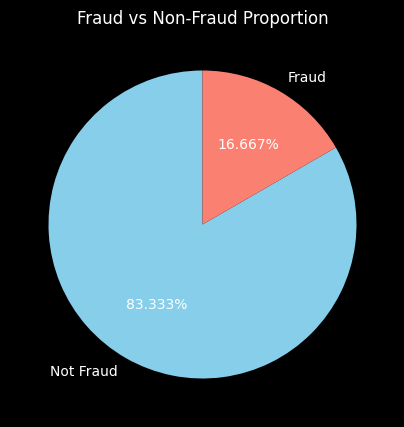

In [ ]:
plt.figure(figsize=(5,5))
visual_df['isFraud'].value_counts().plot.pie(
    autopct='%1.3f%%', startangle=90, colors=['skyblue', 'salmon'], labels=['Not Fraud', 'Fraud']
)
plt.title('Fraud vs Non-Fraud Proportion')
plt.ylabel('')
plt.show()


## Picking the Best Features

In [ ]:
visual_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest',
       'errorBalanceOrig', 'errorBalanceDest', 'amount_to_oldbalance_ratio',
       'balance_change_ratio', 'hour', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'avg_txn_amount',
       'amount_vs_avg_ratio', 'zero_balance_flag', 'log_amount',
       'squared_amount'],
      dtype='object')

In [ ]:
print(visual_df.corr(numeric_only=True))

                                step    amount  oldbalanceOrg  newbalanceOrig  \
step                        1.000000  0.136393       0.035519       -0.027039   
amount                      0.136393  1.000000       0.363491        0.039359   
oldbalanceOrg               0.035519  0.363491       1.000000        0.925866   
newbalanceOrig             -0.027039  0.039359       0.925866        1.000000   
oldbalanceDest              0.003827  0.118764       0.036228        0.053963   
newbalanceDest              0.023602  0.318406       0.063843        0.023576   
isFraud                     0.284429  0.383852       0.104119       -0.087551   
isFlaggedFraud              0.030073  0.064467       0.041461        0.046372   
balanceDiffOrig             0.016244 -0.434759      -0.032790       -0.065887   
balanceDiffDest            -0.103582 -0.494630      -0.371349       -0.161044   
errorBalanceOrig           -0.016244  0.434759       0.032790        0.065887   
errorBalanceDest            

In [ ]:
selected_features = [
    'step', 'amount', 'oldbalanceOrg', 'oldbalanceDest',
    'errorBalanceDest', 'errorBalanceOrig',
    'type_CASH_OUT', 'type_CASH_IN', 'type_TRANSFER',
    'zero_balance_flag', 'hour', 'log_amount', 'isFraud'
]


In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df[selected_features].drop(columns='isFraud')
y = df['isFraud']

mi = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)


hour                 0.115465
type_CASH_IN         0.030600
type_TRANSFER        0.023556
step                 0.010901
oldbalanceOrg        0.002608
amount               0.002445
log_amount           0.002440
errorBalanceOrig     0.002081
errorBalanceDest     0.001340
oldbalanceDest       0.000166
type_CASH_OUT        0.000000
zero_balance_flag    0.000000
dtype: float64


In [ ]:
y = visual_df[['isFraud']]
y.isna()

,isFraud
0,False
1,False
2,False
3,False
4,False
...,...
49273,False
49274,False
49275,False
49276,False


In [ ]:
df.isna().sum()

step                          0
type                          0
amount                        0
nameOrig                      0
oldbalanceOrg                 0
newbalanceOrig                0
nameDest                      0
oldbalanceDest                0
newbalanceDest                0
isFraud                       0
isFlaggedFraud                0
balanceDiffOrig               0
balanceDiffDest               0
errorBalanceOrig              0
errorBalanceDest              0
amount_to_oldbalance_ratio    0
balance_change_ratio          0
hour                          0
type_CASH_IN                  0
type_CASH_OUT                 0
type_DEBIT                    0
type_PAYMENT                  0
type_TRANSFER                 0
avg_txn_amount                0
amount_vs_avg_ratio           0
zero_balance_flag             0
log_amount                    0
squared_amount                0
dtype: int64